# Problem Sheet 2


In this problem sheet, you are expected to 
- Understand the notion of credit risk;
- Import the datas from either online/local data source;
- Perform basic classification of credit risk based on customer data and payment data;
- Evaluate the performance using appropriate measure;
- Practice SVM by using different kernels

### Question 1 : Data Importation 

1. Import the credit risk data (customer_data.csv) and (payment_data.csv) as pandas Dataframe into your notebook, from the source Dataset: https://www.kaggle.com/praveengovi/credit-risk-classification-dataset, name the customer data as "customer_data".

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
customer_data = pd.read_csv('customer_data.csv')
customer_data

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,1,54984789,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,0,58984557,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


### Question 2 : Preparation


2. How many features are there in customer_data? 

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
label     1125 non-null int64
id        1125 non-null int64
fea_1     1125 non-null int64
fea_2     976 non-null float64
fea_3     1125 non-null int64
fea_4     1125 non-null float64
fea_5     1125 non-null int64
fea_6     1125 non-null int64
fea_7     1125 non-null int64
fea_8     1125 non-null int64
fea_9     1125 non-null int64
fea_10    1125 non-null int64
fea_11    1125 non-null float64
dtypes: float64(3), int64(10)
memory usage: 114.3 KB


In [ ]:
customer_data.shape

(1125, 13)

In [ ]:
print("totally 11 features")

totally 11 features


3. Find the number of customers whose label = 0. (identified as the potential defaulted customer.)

In [ ]:
customer_data['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

In [ ]:
print('900 customers whose label = 0')

900 customers whose label = 0


4. using the sklearn to perform data imputation and data scaling for the feature data.

In [ ]:
feature_data = customer_data.iloc[:,2:13]
feature_data

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


In [ ]:
print(feature_data.info())
print('\n obviously, fea_2 is needed to be imputed')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 11 columns):
fea_1     1125 non-null int64
fea_2     976 non-null float64
fea_3     1125 non-null int64
fea_4     1125 non-null float64
fea_5     1125 non-null int64
fea_6     1125 non-null int64
fea_7     1125 non-null int64
fea_8     1125 non-null int64
fea_9     1125 non-null int64
fea_10    1125 non-null int64
fea_11    1125 non-null float64
dtypes: float64(3), int64(8)
memory usage: 96.8 KB
None

 obviously, fea_2 is needed to be imputed


In [ ]:
'''strategy:也就是你采取什么样的策略去填充空值，总共有4种选择。分别是mean,median, most_frequent,以及constant，
这是对于每一列来说的，如果
mean，则该列则由该列的均值填充
median,则是中位数，
most_frequent则是众数
需要注意的是，如果是constant,则可以将空值填充为自定义的值，这就要涉及到后面一个参数了，
也就是fill_value。如果strategy=‘constant’,则填充fill_value的值
'''


from sklearn.impute import SimpleImputer

def imputation(original_data):

    imputer = SimpleImputer(strategy="mean")
    imputer.fit(original_data)
    X = imputer.transform(original_data)
    return pd.DataFrame(X, columns=original_data.columns,
                          index=original_data.index)

In [ ]:
feature_data_imputed = imputation(feature_data)
feature_data_imputed

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5.0,1245.500000,3.0,77000.0,2.0,15.0,5.0,109.0,5.0,151300.0,244.948974
1,4.0,1277.000000,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0,207.173840
2,7.0,1298.000000,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0,1.000000
3,7.0,1335.500000,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0,1.000000
4,7.0,1283.911373,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0,197.403141
5,6.0,1217.000000,3.0,56000.0,2.0,6.0,-1.0,100.0,3.0,60091.0,1.000000
6,4.0,1304.000000,3.0,35000.0,2.0,8.0,9.0,85.0,5.0,60069.0,1.000000
7,5.0,1256.000000,3.0,78000.0,2.0,15.0,-1.0,111.0,3.0,60030.0,1.000000
8,5.0,1323.500000,3.0,218000.0,2.0,15.0,5.0,112.0,4.0,151300.0,282.842713
9,4.0,1283.911373,2.0,35000.0,2.0,8.0,5.0,101.0,3.0,60029.0,237.301496


In [ ]:
# now data scaling：

# 二值化
# 最大最小化(属性缩放)
# 归一化：通过对原始数据进行变换把数据映射到(默认为[0,1])之间
# 绝对值最大标准化:[-1->1]
# 标准化：通过对原始数据进行变换把数据变换到均值为0,方差为1范围内

归一化公式：
![image.png](attachment:image.png)

绝对值最大标准化：
![image.png](attachment:image.png)

正则化公式：
![image.png](attachment:image.png)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


def MMScaling(original_data):
    MMS = MinMaxScaler()
    X= MMS.fit_transform(original_data)
    return pd.DataFrame(X, columns=original_data.columns,
                          index=original_data.index)


In [ ]:
feature_data_imputed_scaled = MMScaling(feature_data_imputed)
feature_data_imputed_scaled

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.00,0.154727,0.345485
1,0.500000,0.440329,0.0,0.082700,1.0,0.384615,0.000000,0.705882,0.50,0.477501,0.291987
2,1.000000,0.497942,0.0,0.080169,1.0,0.615385,0.000000,0.725490,1.00,0.020338,0.000000
3,1.000000,0.600823,0.0,0.114768,1.0,0.615385,0.545455,0.901961,0.50,0.000142,0.000000
4,1.000000,0.459290,0.5,0.037131,1.0,0.615385,0.545455,0.862745,0.75,0.661076,0.278149
5,0.833333,0.275720,1.0,0.034599,1.0,0.230769,0.000000,0.705882,0.50,0.000154,0.000000
6,0.500000,0.514403,1.0,0.016878,1.0,0.384615,0.909091,0.411765,1.00,0.000117,0.000000
7,0.666667,0.382716,1.0,0.053165,1.0,0.923077,0.000000,0.921569,0.50,0.000051,0.000000
8,0.666667,0.567901,1.0,0.171308,1.0,0.923077,0.545455,0.941176,0.75,0.154727,0.399150
9,0.500000,0.459290,0.5,0.016878,1.0,0.384615,0.545455,0.725490,0.50,0.000049,0.334654


In [ ]:
label_data = customer_data.iloc[:,0]
label_data_boolean = (label_data == 1.0)
label_data_boolean

0        True
1       False
2       False
3        True
4       False
5       False
6        True
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18       True
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28       True
29       True
        ...  
1095    False
1096    False
1097    False
1098    False
1099    False
1100    False
1101     True
1102    False
1103     True
1104    False
1105     True
1106    False
1107    False
1108    False
1109    False
1110    False
1111    False
1112    False
1113    False
1114    False
1115    False
1116    False
1117    False
1118    False
1119    False
1120    False
1121    False
1122    False
1123    False
1124    False
Name: label, Length: 1125, dtype: bool

In [ ]:
label_data_boolean_df = pd.DataFrame(label_data_boolean)

In [ ]:
label_data_boolean_df

,label
0,True
1,False
2,False
3,True
4,False
5,False
6,True
7,True
8,False
9,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(feature_data_imputed_scaled,label_data_boolean_df, 
                                                                    test_size=0.2, random_state=20)

In [ ]:
X_train_set

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
141,0.500000,0.658436,0.0,0.112236,1.0,0.384615,0.545455,0.372549,0.50,0.000002,0.000000
1020,1.000000,0.234568,1.0,0.040506,1.0,0.615385,0.000000,0.941176,0.75,0.000097,0.000000
472,1.000000,0.617284,1.0,0.141772,1.0,0.615385,0.545455,0.274510,1.00,0.154727,0.347830
546,0.666667,0.459290,1.0,0.047257,1.0,0.923077,0.000000,0.509804,0.75,0.660939,0.222507
917,0.500000,0.440329,1.0,0.064135,1.0,0.384615,0.545455,0.980392,0.75,0.020337,0.222507
962,0.500000,0.386831,1.0,0.055696,1.0,0.384615,0.818182,0.843137,0.75,0.020338,0.000000
702,0.666667,0.547325,0.0,0.157806,1.0,0.923077,0.545455,0.803922,1.00,0.661030,0.315259
237,0.500000,0.518519,1.0,0.095359,1.0,0.384615,0.545455,0.980392,0.75,0.020337,0.410970
880,0.500000,0.459290,0.5,0.042194,1.0,0.384615,0.909091,0.941176,1.00,0.020338,0.291261
267,1.000000,0.459290,0.5,0.048945,1.0,0.615385,0.909091,0.882353,0.50,0.154727,0.267389


In [ ]:
y_train_set

,label
141,False
1020,False
472,False
546,False
917,True
962,False
702,False
237,True
880,False
267,False


Bonus: please use different ways to do data scaling. Then use the different processed datasets to train following models. Compare the results and explain the advantages and disadvantages of different data scaling methods.

### Question 3 : Binary Classification



5. Build a linear model using cross validation (3-folds), taking accuracy as the criteria, and show the score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
lgr_clf = LogisticRegression(penalty='l2', C=0.7,solver="liblinear",max_iter=100000,tol=1e-6)
lgr_clf.fit(X_train_set, y_train_set)

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7, max_iter=100000, solver='liblinear', tol=1e-06)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lgr_clf, X_test_set, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.81333333, 0.81333333, 0.81333333])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lgr_clf, X_test_set, y_test_set, cv=3)


D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lgr_clf.predict(X_train_set)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
y_train_set

,label
141,False
1020,False
472,False
546,False
917,True
962,False
702,False
237,True
880,False
267,False


![image.png](attachment:image.png)

6. Find the confusion matrix, the recall and precision of the model prediction. Is the performance satisfactory?

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_set, y_train_set)

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test_set, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.81333333, 0.8       , 0.78666667])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(sgd_clf, X_test_set, y_test_set, cv=3)
y_test_pred

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
y_test_set

,label
989,False
734,False
143,False
137,False
1032,False
710,False
568,False
421,False
320,False
645,False


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_set, y_test_pred)

array([[180,   3],
       [ 42,   0]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score

prediction = precision_score(np.array(y_test_set).reshape(225,), y_test_pred,average='binary')
recall  = recall_score(y_test_set, y_test_pred,average='binary')
print("prediction_score")
print (prediction)
print("recall_score")
print (recall)

prediction_score
0.0
recall_score
0.0


In [ ]:
cnt = 0
ac = 0
for i,j in zip(np.array(y_test_set).reshape(225,),y_test_pred):
    cnt += 1
    if i==j:
        ac += 1
        pass
    pass
print(cnt,ac)
print(ac/cnt)

225 180
0.8


In [ ]:
#recall
print(180/222)
#recall
print(180/183)

0.8108108108108109
0.9836065573770492


Bonus: try to plot the confusion matrix, and explain what it reflects.

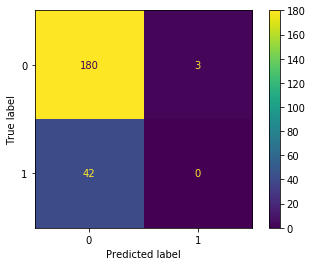

In [ ]:
# 绘制多分类混淆矩阵
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# probabilities为所有测试结果，yv为验证集Validation samples (images, labels)
cnf_matrix = confusion_matrix(y_test_set, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

Confusion matrix, without normalization


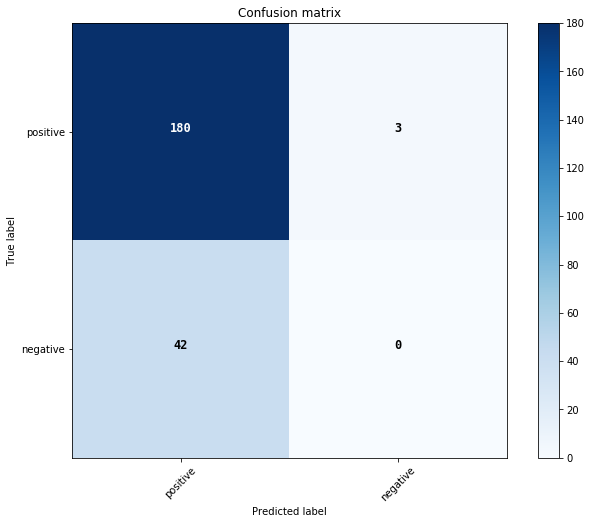

In [ ]:
# 绘制多分类混淆矩阵
from sklearn.metrics import confusion_matrix
import itertools
# probabilities为所有测试结果，yv为验证集Validation samples (images, labels)
cnf_matrix = confusion_matrix(y_test_set, y_test_pred) 
    
    
classes = [ 'positive','negative' ]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,path="maxtix"):
    """
    画混淆矩阵
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    画图函数 输入：
    cm 矩阵 
    classes 输入str类型
    title 名字
    cmap [图的颜色设置](https://matplotlib.org/examples/color/colormaps_reference.html)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(11,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, 
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontdict=dict(fontsize=12,
                               family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                               weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                              )
                )
        

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#     plt.savefig(path,dpi=500)  
    plt.show()
    pass
plot_confusion_matrix(cm=cnf_matrix,classes=classes,normalize=False)
    

### Question 4 : Support Vector Machine




7. Train a SVM with polynomial kernal and Gaussian RBF kernal (with cross-validation). Does that improve the result or not? 

In [ ]:
# 多项式核函数
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5)),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X_train_set, y_train_set)


# blog:https://blog.csdn.net/weixin_41803874/article/details/107779335?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164673225116780274199934%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164673225116780274199934&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-107779335.pc_search_result_cache&utm_term=LinearSVC&spm=1018.2226.3001.4187

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=5)),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(polynomial_svm_clf, X_test_set, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1

array([0.64, 0.56, 0.64])

![image.png](attachment:image.png)

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([ 
                                 ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=10))
                                ])
poly_kernel_svm_clf.fit(X_train_set, y_train_set)
cross_val_score(poly_kernel_svm_clf, X_test_set, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.64      , 0.65333333, 0.69333333])

In [ ]:
# 高斯核函数
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

rbf_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel = 'rbf', gamma=5, C=100,random_state=42,coef0=1))
    ])

rbf_svm_clf.fit(X_train_set, y_train_set)
cross_val_score(rbf_svm_clf, X_test_set, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.74666667, 0.73333333, 0.72      ])

In [ ]:
# 11 features

Remark: It is known that, according to the data provider,  most features in the customer information data are encoded via the demographic information,  instead of their financial situation. Is this reasonable? Give your opinions

Bonus : if you know what PCA can do, you can try to transform the dataset to 2-dimension dataset(use package from sklearn). Then try to train the SVM model and plot the decision boundary with matplotlib

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
low_dimension_fea = pca_model.fit_transform(feature_data_imputed_scaled)
low_dimension_X_train = pca_model.fit_transform(X_train_set)
low_dimension_X_test = pca_model.fit_transform(X_test_set)

print(low_dimension_X_train)
print('----------------------------------')
print(low_dimension_X_test)

[[ 0.68131271 -0.43817967]
 [-0.23481037  0.29694703]
 [-0.33189249  0.12013965]
 ...
 [-0.32339613 -0.16077672]
 [-0.37802083  0.03313517]
 [ 0.18514497 -0.29435666]]
----------------------------------
[[ 0.2169333  -0.07408705]
 [-0.31346613  0.04772326]
 [-0.44526957 -0.29849924]
 [ 0.78807385  0.58108272]
 [ 0.64462229 -0.25042451]
 [-0.29380269 -0.30578703]
 [-0.38145501 -0.00953023]
 [-0.31195095  0.46750887]
 [ 0.52693952 -0.26626743]
 [-0.43471419 -0.01337586]
 [-0.18941217  0.62763592]
 [ 0.7790108  -0.02055822]
 [-0.29007767 -0.44278455]
 [-0.39144196  0.02021055]
 [-0.46572052 -0.20262185]
 [ 0.5382199  -0.30473573]
 [ 0.01180903 -0.16538093]
 [ 0.29742814 -0.08021113]
 [-0.25349268  0.59378797]
 [-0.40366744 -0.47125363]
 [ 0.60731875 -0.08491279]
 [ 0.64075588 -0.13319624]
 [ 0.69672655 -0.52327232]
 [-0.27123132  0.66433632]
 [ 0.57071744  0.44379216]
 [-0.34114953 -0.08096614]
 [-0.32623802  0.6105104 ]
 [-0.31835256  0.45673007]
 [ 0.63081625 -0.15470888]
 [ 0.58865273 

In [ ]:
# 高斯核函数
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

rbf_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel = 'rbf', gamma=5, C=10000,random_state=42,coef0=1))
    ])

rbf_svm_clf.fit(low_dimension_X_train, y_train_set)
cross_val_score(rbf_svm_clf, low_dimension_X_test, y_test_set, cv=3, scoring="accuracy")

D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.78666667, 0.73333333, 0.77333333])

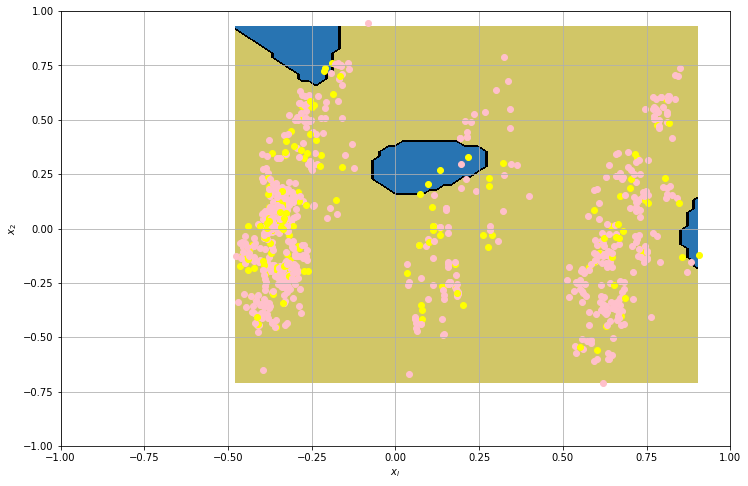

In [ ]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap

def plot_dataset(X, y
                 , axes
                ):
    for i,j in zip(X,np.array(y)):
        if j:
            plt.scatter(i[0],i[1],c='yellow')
            pass
        else:
            plt.scatter(i[0],i[1],c='pink')

    plt.axis( axes )
    plt.grid( True, which="both" )
    plt.xlabel(r"$x_l$")
    plt.ylabel(r"$x_2$")
    pass







x1_min,x1_max = low_dimension_X_train[:,0].min(), low_dimension_X_train[:,0].max()
x2_min,x2_max = low_dimension_X_train[:,1].min(), low_dimension_X_train[:,1].max()

# print(np.arange(x1_min, x1_max, 0.02).shape)

x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))

# print(x1.shape,"-----",x2.shape)
# # predict the point
Z = rbf_svm_clf.predict(np.c_[x1.ravel(), x2.ravel()])
# print(Z.shape)
Z = Z.reshape(x1.shape)
# print(Z.shape)

# plt.contourf(x1, x2, Z, cmap=plt.cm.RdYlBu)

plt.contourf(x1, x2, Z, cmap=ListedColormap(['#d1c667', 'black', '#2874B2']))



plot_dataset( low_dimension_X_train,y_train_set
             , [-1, 1, -1,1] 
            )


plt.show()

In [ ]:
low_dimension_X_test

array([[ 0.2169333 , -0.07408705],
       [-0.31346613,  0.04772326],
       [-0.44526957, -0.29849924],
       [ 0.78807385,  0.58108272],
       [ 0.64462229, -0.25042451],
       [-0.29380269, -0.30578703],
       [-0.38145501, -0.00953023],
       [-0.31195095,  0.46750887],
       [ 0.52693952, -0.26626743],
       [-0.43471419, -0.01337586],
       [-0.18941217,  0.62763592],
       [ 0.7790108 , -0.02055822],
       [-0.29007767, -0.44278455],
       [-0.39144196,  0.02021055],
       [-0.46572052, -0.20262185],
       [ 0.5382199 , -0.30473573],
       [ 0.01180903, -0.16538093],
       [ 0.29742814, -0.08021113],
       [-0.25349268,  0.59378797],
       [-0.40366744, -0.47125363],
       [ 0.60731875, -0.08491279],
       [ 0.64075588, -0.13319624],
       [ 0.69672655, -0.52327232],
       [-0.27123132,  0.66433632],
       [ 0.57071744,  0.44379216],
       [-0.34114953, -0.08096614],
       [-0.32623802,  0.6105104 ],
       [-0.31835256,  0.45673007],
       [ 0.63081625,

### Question5 : Now use the information from the payment data in another csv file, and try to see if that helps improve the classification performance. (You have the freedom to choose linear or nonlinear models).